In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import cv2
import pathlib

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url="/content/drive/MyDrive/corona2021"

In [ ]:
url=pathlib.Path(url)

In [ ]:
data={"COVID":list(url.glob("COVID/*")),
      "non-COVID":list(url.glob("non-COVID/*"))}

In [ ]:
data_index={"COVID":1,
            "non-COVID":0}

In [ ]:
len(data["COVID"])

1252

In [ ]:
len(data["non-COVID"])

1229

In [ ]:
import PIL

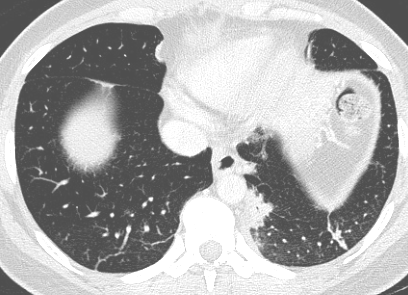

In [ ]:
PIL.Image.open(data["COVID"][0])

In [ ]:
img_arr=cv2.imread(str(data["COVID"][20]))

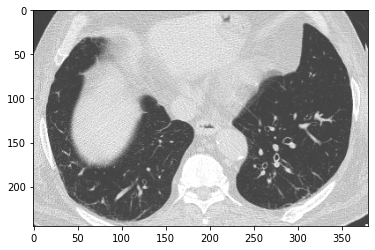

In [ ]:
plt.imshow(img_arr)

In [ ]:
gray=cv2.cvtColor(img_arr,cv2.COLOR_BGR2GRAY)

In [ ]:
hsc=cv2.cvtColor(img_arr,cv2.COLOR_BGR2HSV)

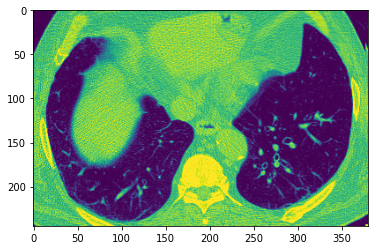

In [ ]:
plt.imshow(gray)

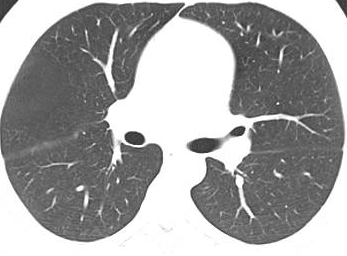

In [ ]:
PIL.Image.open(data["non-COVID"][0])

In [ ]:
img_arr1=cv2.imread(str(data["non-COVID"][10]))

In [ ]:
gray1=cv2.cvtColor(img_arr1,cv2.COLOR_BGR2GRAY)

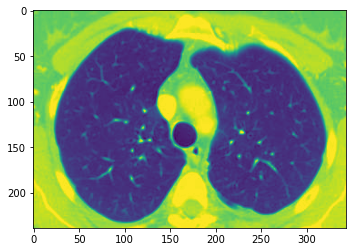

In [ ]:
plt.imshow(gray1)

In [ ]:
gray1.shape

(239, 344)

In [ ]:
img_arr1.shape

(239, 344, 3)

In [ ]:
x,y=[],[]
for name,lis in data.items():
  for l in lis:
    img_array=cv2.imread(str(l))
    img_resize=cv2.resize(img_array,(224,224))
    x.append(img_resize)
    y.append(data_index[name])

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x=x/255

In [ ]:
x.shape

(2481, 224, 224, 3)

In [ ]:
y.shape

(2481,)

In [ ]:
x.dtype

dtype('float64')

In [ ]:
y.dtype

dtype('int64')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
import tensorflow_hub as hub

In [ ]:
model=keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/feature_vector/5",trainable=False,input_shape=(224,224,3)),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(
    optimizer="adam",
    loss="BinaryCrossentropy",
    metrics=["accuracy"]
)
model.fit(x_train,y_train,epochs=25)

Epoch 1/25
62/62 [==============================] - 36s 54ms/step - loss: 0.4507 - accuracy: 0.8024
Epoch 2/25
62/62 [==============================] - 3s 54ms/step - loss: 0.3315 - accuracy: 0.8664
Epoch 3/25
62/62 [==============================] - 3s 55ms/step - loss: 0.2844 - accuracy: 0.8931
Epoch 4/25
62/62 [==============================] - 3s 55ms/step - loss: 0.2578 - accuracy: 0.9012
Epoch 5/25
62/62 [==============================] - 3s 55ms/step - loss: 0.2351 - accuracy: 0.9189
Epoch 6/25
62/62 [==============================] - 3s 55ms/step - loss: 0.2160 - accuracy: 0.9229
Epoch 7/25
62/62 [==============================] - 3s 55ms/step - loss: 0.2022 - accuracy: 0.9385
Epoch 8/25
62/62 [==============================] - 3s 55ms/step - loss: 0.1880 - accuracy: 0.9435
Epoch 9/25
62/62 [==============================] - 3s 55ms/step - loss: 0.1809 - accuracy: 0.9446
Epoch 10/25
62/62 [==============================] - 3s 55ms/step - loss: 0.1663 - accuracy: 0.9506
Epoch 11

In [ ]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 2s 85ms/step - loss: 0.1781 - accuracy: 0.9416


[0.17809884250164032, 0.9416499137878418]

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
y_pred=[]
for i in y_predict:
  if i[0]<0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [ ]:
pd.Series(y_pred).unique()

array([1, 0])

In [ ]:
y_pred=np.array(y_pred)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test,y_pred)

0.9416498993963782

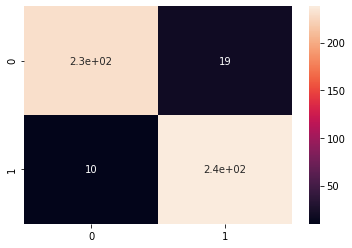

In [ ]:
sb.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [ ]:
metrics.recall_score(y_test,y_pred)

0.9596774193548387

In [ ]:
model.save("covid")

INFO:tensorflow:Assets written to: covid/assets


INFO:tensorflow:Assets written to: covid/assets


In [ ]:
model_=keras.models.load_model("/content/covid")

In [ ]:
model_.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1792)              4363712   
_________________________________________________________________
dense (Dense)                (None, 1)                 1793      
Total params: 4,365,505
Trainable params: 1,793
Non-trainable params: 4,363,712
_________________________________________________________________
